In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df = pd.read_csv(r"D:\UMA\COCA COLA STOCK ANALYSIS\COCO COLA.csv")
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,02-01-1962,0.263021,0.270182,0.263021,0.263021,0.051133,806400
1,03-01-1962,0.259115,0.259115,0.253255,0.257161,0.049994,1574400
2,04-01-1962,0.257813,0.261068,0.257813,0.259115,0.050374,844800
3,05-01-1962,0.259115,0.262370,0.252604,0.253255,0.049234,1420800
4,08-01-1962,0.251302,0.251302,0.245768,0.250651,0.048728,2035200


In [3]:
df.shape

(15096, 7)

In [4]:
df.describe

<bound method NDFrame.describe of              Date       Open       High        Low      Close  Adj Close  \
0      02-01-1962   0.263021   0.270182   0.263021   0.263021   0.051133   
1      03-01-1962   0.259115   0.259115   0.253255   0.257161   0.049994   
2      04-01-1962   0.257813   0.261068   0.257813   0.259115   0.050374   
3      05-01-1962   0.259115   0.262370   0.252604   0.253255   0.049234   
4      08-01-1962   0.251302   0.251302   0.245768   0.250651   0.048728   
...           ...        ...        ...        ...        ...        ...   
15091  13-12-2021  56.980000  57.930000  56.959999  57.759998  57.759998   
15092  14-12-2021  57.400002  58.169998  57.400002  57.799999  57.799999   
15093  15-12-2021  57.930000  58.250000  57.650002  58.060001  58.060001   
15094  16-12-2021  57.980000  58.880001  57.900002  58.650002  58.650002   
15095  17-12-2021  58.490002  58.919998  57.700001  57.730000  57.730000   

         Volume  
0        806400  
1       1574400  

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15096 entries, 0 to 15095
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       15096 non-null  object 
 1   Open       15096 non-null  float64
 2   High       15096 non-null  float64
 3   Low        15096 non-null  float64
 4   Close      15096 non-null  float64
 5   Adj Close  15096 non-null  float64
 6   Volume     15096 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 825.7+ KB
None


In [6]:
print(df.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [7]:
#Getting live data from Yahoo Finance API
import yfinance as yf

ticker = 'KO'
stock = yf.Ticker(ticker)

# Fetch maximum available historical data
hist = stock.history(period="max")

# Fetch Dividends and Stock Splits separately
dividends = stock.dividends
splits = stock.splits

# Initialize the columns with 0
hist['Dividends'] = 0
hist['Stock Splits'] = 0

# If dividends data exists, update hist
if not dividends.empty:
    # Align on index and update corresponding values
    hist.loc[dividends.index, 'Dividends'] = dividends

# If splits data exists, update hist
if not splits.empty:
    hist.loc[splits.index, 'Stock Splits'] = splits

print(hist[['Dividends', 'Stock Splits']].head())


                           Dividends  Stock Splits
Date                                              
1962-01-02 00:00:00-05:00        0.0             0
1962-01-03 00:00:00-05:00        0.0             0
1962-01-04 00:00:00-05:00        0.0             0
1962-01-05 00:00:00-05:00        0.0             0
1962-01-08 00:00:00-05:00        0.0             0


C:\Users\DS\AppData\Local\Temp/ipykernel_6796/1948101014.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.001563 0.001563 0.001563 0.001563 0.001758 0.001758 0.001758 0.001758
 0.001953 0.001953 0.001953 0.001953 0.002214 0.002214 0.002214 0.002214
 0.002474 0.002474 0.002474 0.002474 0.002734 0.002734 0.002734 0.002734
 0.002734 0.003125 0.003125 0.003125 0.003438 0.003438 0.003438 0.003438
 0.00375  0.00375  0.00375  0.004115 0.004115 0.004115 0.004115 0.004271
 0.004271 0.004271 0.004271 0.004427 0.004427 0.004948 0.004948 0.005292
 0.005292 0.005552 0.005552 0.00599  0.00599  0.00599  0.00599  0.006896
 0.006896 0.006896 0.006896 0.008021 0.008021 0.008021 0.008021 0.009063
 0.009063 0.009063 0.009063 0.010208 0.010208 0.010208 0.010208 0.01125
 0.01125  0.01125  0.01125  0.012083 0.012083 0.012083 0.012083 0.012917
 0.012917 0.012917 0.012917 0.013958 0.013958 0.013958 0.013958 0.014375
 0.01

C:\Users\DS\AppData\Local\Temp/ipykernel_6796/3190775682.py:8: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True, infer_datetime_format=True)


First 10 raw date values:
['02-01-1962', '03-01-1962', '04-01-1962', '05-01-1962', '08-01-1962', '09-01-1962', '10-01-1962', '11-01-1962', '12-01-1962', '15-01-1962']
First 10 converted date values:
[Timestamp('1962-01-02 00:00:00'), Timestamp('1962-01-03 00:00:00'), Timestamp('1962-01-04 00:00:00'), Timestamp('1962-01-05 00:00:00'), Timestamp('1962-01-08 00:00:00'), Timestamp('1962-01-09 00:00:00'), Timestamp('1962-01-10 00:00:00'), Timestamp('1962-01-11 00:00:00'), Timestamp('1962-01-12 00:00:00'), Timestamp('1962-01-15 00:00:00')]


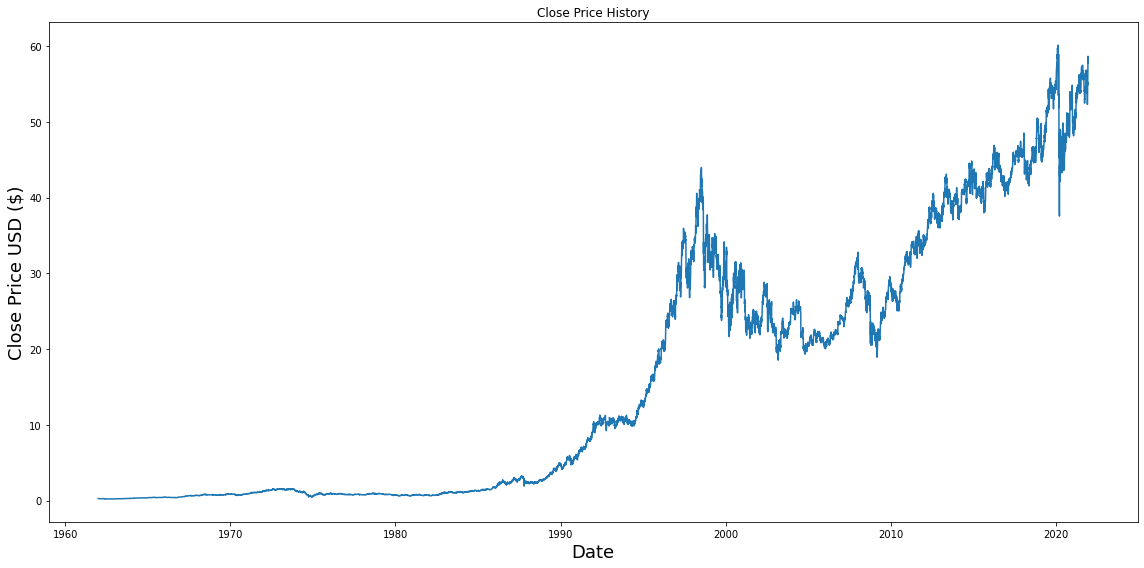

In [8]:
#Line plot for stock prices

# Show first 10 raw date entries for inspection
print("First 10 raw date values:")
print(df['Date'].head(10).tolist())

# Use pandas' flexible to_datetime with 'infer_datetime_format' and 'errors=coerce'
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True, infer_datetime_format=True)

# Drop bad rows if any remain
df = df.dropna(subset=['Date'])

print("First 10 converted date values:")
print(df['Date'].head(10).tolist())

plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Date'].values, df['Close'].values)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.tight_layout()
plt.show()


In [9]:
 # Add Moving Averages
df['MA_20'] = df['Close'].rolling(window=20).mean()
df['MA_50'] = df['Close'].rolling(window=50).mean()
 # Add Daily Returns
df['Daily_Return'] = df['Close'].pct_change()
 # Add Volatility (standard deviation of returns over a rolling window)
df['Volatility'] =df['Daily_Return'].rolling(window=20).std()
 # Drop rows with NA due to rolling calculations
df.dropna(inplace=True)
print(df.head())

         Date      Open      High       Low     Close  Adj Close   Volume  \
49 1962-03-13  0.242513  0.244466  0.242513  0.244466   0.047834  1344000   
50 1962-03-14  0.244466  0.245443  0.243490  0.244792   0.047898  1689600   
51 1962-03-15  0.244792  0.245443  0.243490  0.243490   0.047644   883200   
52 1962-03-16  0.243490  0.244466  0.243490  0.243490   0.047644   768000   
53 1962-03-19  0.243490  0.246094  0.243490  0.244792   0.047898   921600   

       MA_20     MA_50  Daily_Return  Volatility  
49  0.240706  0.244629      0.009406    0.012890  
50  0.240674  0.244264      0.001334    0.012894  
51  0.240804  0.243991     -0.005319    0.012215  
52  0.240999  0.243678      0.000000    0.012134  
53  0.241260  0.243509      0.005347    0.012173  


In [10]:
# Appending 'Dividends' and 'Stock Splits' columns in dataset

if 'Dividends' not in df.columns:
    df['Dividends'] = 0

if 'Stock Splits' not in df.columns:
    df['Stock Splits'] = 0

print(df[['Dividends', 'Stock Splits']].head())


    Dividends  Stock Splits
49          0             0
50          0             0
51          0             0
52          0             0
53          0             0


In [11]:
df.head

<bound method NDFrame.head of             Date       Open       High        Low      Close  Adj Close  \
49    1962-03-13   0.242513   0.244466   0.242513   0.244466   0.047834   
50    1962-03-14   0.244466   0.245443   0.243490   0.244792   0.047898   
51    1962-03-15   0.244792   0.245443   0.243490   0.243490   0.047644   
52    1962-03-16   0.243490   0.244466   0.243490   0.243490   0.047644   
53    1962-03-19   0.243490   0.246094   0.243490   0.244792   0.047898   
...          ...        ...        ...        ...        ...        ...   
15091 2021-12-13  56.980000  57.930000  56.959999  57.759998  57.759998   
15092 2021-12-14  57.400002  58.169998  57.400002  57.799999  57.799999   
15093 2021-12-15  57.930000  58.250000  57.650002  58.060001  58.060001   
15094 2021-12-16  57.980000  58.880001  57.900002  58.650002  58.650002   
15095 2021-12-17  58.490002  58.919998  57.700001  57.730000  57.730000   

         Volume      MA_20      MA_50  Daily_Return  Volatility  Divi

In [12]:
#Splitting data into train and test set
from sklearn.model_selection import train_test_split
features = ['Open', 'High', 'Low', 'Volume', 'Dividends','Stock Splits', 'MA_20', 'MA_50', 'Daily_Return', 'Volatility']
target = ['Close']
X = df[features]
y = df[target]
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42, shuffle=False)


In [13]:
X_train


,Open,High,Low,Volume,Dividends,Stock Splits,MA_20,MA_50,Daily_Return,Volatility
49,0.242513,0.244466,0.242513,1344000,0,0,0.240706,0.244629,0.009406,0.012890
50,0.244466,0.245443,0.243490,1689600,0,0,0.240674,0.244264,0.001334,0.012894
51,0.244792,0.245443,0.243490,883200,0,0,0.240804,0.243991,-0.005319,0.012215
52,0.243490,0.244466,0.243490,768000,0,0,0.240999,0.243678,0.000000,0.012134
53,0.243490,0.246094,0.243490,921600,0,0,0.241260,0.243509,0.005347,0.012173
...,...,...,...,...,...,...,...,...,...,...
12081,28.725000,28.985001,28.725000,9551000,0,0,28.916250,28.170800,0.005223,0.008852
12082,28.870001,28.950001,28.740000,9625200,0,0,28.906250,28.199700,-0.001039,0.008132
12083,28.790001,28.875000,28.465000,10848800,0,0,28.882250,28.229000,-0.011789,0.008523
12084,28.580000,28.610001,28.450001,13870400,0,0,28.876500,28.258700,0.000702,0.008115


In [14]:
X_test


,Open,High,Low,Volume,Dividends,Stock Splits,MA_20,MA_50,Daily_Return,Volatility
12086,28.174999,28.219999,27.990000,19264600,0,0,28.80950,28.3116,-0.000355,0.008288
12087,28.165001,28.184999,27.875000,13234600,0,0,28.77225,28.3412,-0.002485,0.008280
12088,27.730000,27.820000,27.375000,28712400,0,0,28.70525,28.3581,-0.018509,0.009068
12089,27.575001,28.225000,27.400000,28642400,0,0,28.64750,28.3857,0.020308,0.009836
12090,28.045000,28.500000,28.030001,23269800,0,0,28.59175,28.4136,0.010841,0.009949
...,...,...,...,...,...,...,...,...,...,...
15091,56.980000,57.930000,56.959999,31362800,0,0,54.98800,55.0474,0.026297,0.016861
15092,57.400002,58.169998,57.400002,24806600,0,0,55.04700,55.1436,0.000693,0.016860
15093,57.930000,58.250000,57.650002,24923800,0,0,55.13900,55.2432,0.004498,0.016761
15094,57.980000,58.880001,57.900002,24696900,0,0,55.27600,55.3420,0.010162,0.016770


In [15]:
y_train


,Close
49,0.244466
50,0.244792
51,0.243490
52,0.243490
53,0.244792
...,...
12081,28.870001
12082,28.840000
12083,28.500000
12084,28.520000


In [16]:
y_test

,Close
12086,28.165001
12087,28.094999
12088,27.575001
12089,28.135000
12090,28.440001
...,...
15091,57.759998
15092,57.799999
15093,58.060001
15094,58.650002


In [17]:
#Random Forest Model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Prepare data
features = ['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits', 'MA_20', 'MA_50', 'Daily_Return', 'Volatility']
target = 'Close'
X_rf = df[features]
y_rf = df[target]

# Train-test split
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, shuffle=False, random_state=42)

# Model training and prediction
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_rf, y_train_rf)
y_pred_rf = rf_model.predict(X_test_rf)

# Evaluation
rf_mse = mean_squared_error(y_test_rf, y_pred_rf)
rf_mae = mean_absolute_error(y_test_rf, y_pred_rf)
print(f"[Random Forest] MSE: {rf_mse:.4f}, MAE: {rf_mae:.4f}")


[Random Forest] MSE: 19.8252, MAE: 2.3529


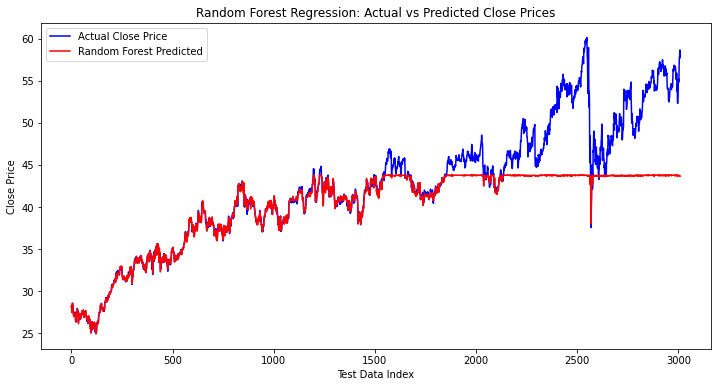

In [18]:
#Visualizing results of Random Forest Regression
# Ensure both arrays are 1D before plotting
y_test_1d = np.array(y_test_rf).flatten()
y_pred_1d = np.array(y_pred_rf).flatten()

plt.figure(figsize=(12,6))
plt.plot(range(len(y_test_1d)), y_test_1d, label='Actual Close Price', color='blue')
plt.plot(range(len(y_pred_1d)), y_pred_1d, label='Random Forest Predicted', color='red')
plt.title('Random Forest Regression: Actual vs Predicted Close Prices')
plt.xlabel('Test Data Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()


In [19]:
#LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Only use the last 5000 data points for fast training
recent_rows = 5000
X_lstm = df[features].values[-recent_rows:]
y_lstm = df[target].values[-recent_rows:]

scaler_X_lstm = MinMaxScaler()
scaler_y_lstm = MinMaxScaler()

X_scaled_lstm = scaler_X_lstm.fit_transform(X_lstm)
y_scaled_lstm = scaler_y_lstm.fit_transform(y_lstm.reshape(-1, 1))

def create_lstm_sequences(X, y, window=30):  # Reduced window
    Xs, ys = [], []
    for i in range(len(X) - window):
        Xs.append(X[i:i+window])
        ys.append(y[i+window])
    return np.array(Xs), np.array(ys)

window = 30
X_lstm_seq, y_lstm_seq = create_lstm_sequences(X_scaled_lstm, y_scaled_lstm, window=window)
split_idx = int(len(X_lstm_seq)*0.8)
X_train_lstm, X_test_lstm = X_lstm_seq[:split_idx], X_lstm_seq[split_idx:]
y_train_lstm, y_test_lstm = y_lstm_seq[:split_idx], y_lstm_seq[split_idx:]

# Simpler, smaller model
model_lstm = Sequential([
    LSTM(8, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    Dense(1)
])
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

model_lstm.fit(X_train_lstm, y_train_lstm, epochs=3, batch_size=128, verbose=1, validation_data=(X_test_lstm, y_test_lstm))

y_pred_lstm_scaled = model_lstm.predict(X_test_lstm)
y_pred_lstm = scaler_y_lstm.inverse_transform(y_pred_lstm_scaled).flatten()
y_test_lstm_orig = scaler_y_lstm.inverse_transform(y_test_lstm).flatten()

from sklearn.metrics import mean_squared_error, mean_absolute_error
print("[LSTM FAST] MSE: %.4f, MAE: %.4f" % (
    mean_squared_error(y_test_lstm_orig, y_pred_lstm),
    mean_absolute_error(y_test_lstm_orig, y_pred_lstm)
))


Epoch 1/3
32/32 [==============================] - 5s 46ms/step - loss: 0.0047 - val_loss: 0.0094
Epoch 2/3
32/32 [==============================] - 0s 15ms/step - loss: 4.6767e-04 - val_loss: 0.0091
Epoch 3/3
32/32 [==============================] - 1s 16ms/step - loss: 2.6417e-04 - val_loss: 0.0056
[LSTM FAST] MSE: 9.7683, MAE: 2.5940


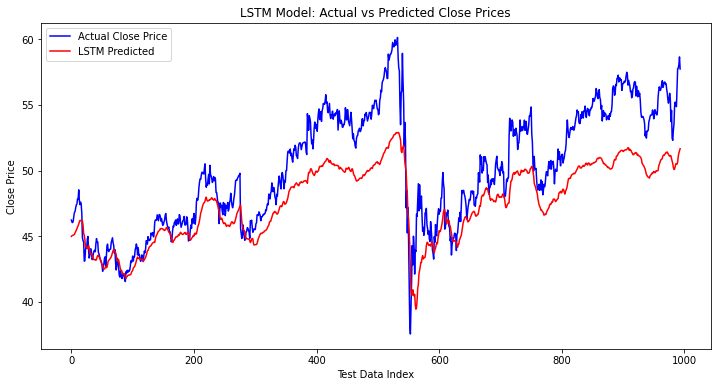

In [20]:
#Visualizing results of LSTM
plt.figure(figsize=(12,6))
plt.plot(y_test_lstm_orig, label='Actual Close Price', color='blue')
plt.plot(y_pred_lstm, label='LSTM Predicted', color='red')
plt.title('LSTM Model: Actual vs Predicted Close Prices')
plt.xlabel('Test Data Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()


In [21]:
#SVR Model
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Prepare data
X_svr = df[features].values
y_svr = df[target].values

# Scaling
scaler_X_svr = StandardScaler()
scaler_y_svr = StandardScaler()

X_scaled_svr = scaler_X_svr.fit_transform(X_svr)
y_scaled_svr = scaler_y_svr.fit_transform(y_svr.reshape(-1, 1)).flatten()

# Train-test split
X_train_svr, X_test_svr, y_train_svr, y_test_svr = train_test_split(
    X_scaled_svr, y_scaled_svr, test_size=0.2, shuffle=False, random_state=42)

# SVR training and prediction
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_model.fit(X_train_svr, y_train_svr)
y_pred_svr_scaled = svr_model.predict(X_test_svr)
y_pred_svr = scaler_y_svr.inverse_transform(y_pred_svr_scaled.reshape(-1, 1)).flatten()
y_test_svr_orig = scaler_y_svr.inverse_transform(y_test_svr.reshape(-1, 1)).flatten()

# Evaluation
svr_mse = mean_squared_error(y_test_svr_orig, y_pred_svr)
svr_mae = mean_absolute_error(y_test_svr_orig, y_pred_svr)
print(f"[SVR] MSE: {svr_mse:.4f}, MAE: {svr_mae:.4f}")


[SVR] MSE: 141.8587, MAE: 8.1669


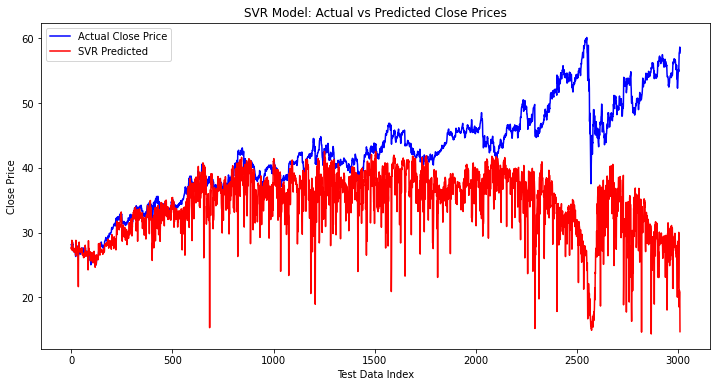

In [22]:
#Visualizing results of SVR

plt.figure(figsize=(12,6))
plt.plot(y_test_svr_orig, label='Actual Close Price', color='blue')
plt.plot(y_pred_svr, label='SVR Predicted', color='red')
plt.title('SVR Model: Actual vs Predicted Close Prices')
plt.xlabel('Test Data Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()


In [23]:
from sklearn.metrics import r2_score

# Compute and align arrays as before
min_len = min(len(y_test_rf), len(y_pred_rf),
              len(y_test_svr_orig), len(y_pred_svr),
              len(y_test_lstm_orig), len(y_pred_lstm))
y_rf, p_rf = np.array(y_test_rf).flatten()[:min_len], np.array(y_pred_rf).flatten()[:min_len]
y_svr, p_svr = np.array(y_test_svr_orig).flatten()[:min_len], np.array(y_pred_svr).flatten()[:min_len]
y_lstm, p_lstm = np.array(y_test_lstm_orig).flatten()[:min_len], np.array(y_pred_lstm).flatten()[:min_len]

# Build results DataFrame
results = pd.DataFrame({
    'Model': ['Random Forest', 'SVR', 'LSTM'],
    'MSE': [mean_squared_error(y_rf, p_rf), mean_squared_error(y_svr, p_svr), mean_squared_error(y_lstm, p_lstm)],
    'MAE': [mean_absolute_error(y_rf, p_rf), mean_absolute_error(y_svr, p_svr), mean_absolute_error(y_lstm, p_lstm)],
    'R2 Score': [r2_score(y_rf, p_rf), r2_score(y_svr, p_svr), r2_score(y_lstm, p_lstm)]
})
print(results)

# Find best models
best_mse_model = results.loc[results['MSE'].idxmin(), 'Model']
best_mae_model = results.loc[results['MAE'].idxmin(), 'Model']
best_r2_model = results.loc[results['R2 Score'].idxmax(), 'Model']

print(f"Best Model by MSE: {best_mse_model}")
print(f"Best Model by MAE: {best_mae_model}")
print(f"Best Model by R2 Score: {best_r2_model}")


           Model       MSE       MAE  R2 Score
0  Random Forest  0.029326  0.129307  0.998597
1            SVR  7.333448  1.819937  0.649275
2           LSTM  9.768259  2.593981  0.508757
Best Model by MSE: Random Forest
Best Model by MAE: Random Forest
Best Model by R2 Score: Random Forest
